In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [23]:
# 加载训练和测试数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y_complex'].values
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 添加截距项


X_test = test_data['x_new'].values.reshape(-1, 1)
y_test = test_data['y_new_complex'].values
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 添加截距项

## 最小二乘法

In [24]:

# 移除包含NaN值的行
X_train_b = X_train_b[~np.isnan(X_train_b).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]
X_test_b = X_test_b[~np.isnan(X_test_b).any(axis=1)]
y_test = y_test[~np.isnan(y_test)]

theta_ls = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# 计算预测值
train_pred_ls = X_train_b @ theta_ls
test_pred_ls = X_test_b @ theta_ls

# 计算误差
ls_train_mse = mean_squared_error(y_train, train_pred_ls)
ls_test_mse = mean_squared_error(y_test, test_pred_ls)

print(f"最小二乘法 - 训练误差: {ls_train_mse:.6f}, 测试误差: {ls_test_mse:.6f}")

最小二乘法 - 训练误差: 0.613402, 测试误差: 0.595043


## 梯度下降法

In [25]:
# 梯度下降法参数
lr = 0.01
n_iters = 10000
theta_gd = np.random.randn(2, 1)
loss_history = []

# 梯度下降迭代
for iteration in range(n_iters):
    # 计算梯度
    gradients = 2/len(X_train_b) * X_train_b.T @ (X_train_b @ theta_gd - y_train.reshape(-1, 1))
    
    # 更新参数
    theta_gd -= lr * gradients
    
    # 记录损失
    if iteration % 500 == 0:
        current_loss = np.mean((X_train_b @ theta_gd - y_train.reshape(-1, 1))**2)
        loss_history.append(current_loss)

# 计算预测值
train_pred_gd = X_train_b @ theta_gd
test_pred_gd = X_test_b @ theta_gd

# 计算误差
gd_train_mse = mean_squared_error(y_train, train_pred_gd)
gd_test_mse = mean_squared_error(y_test, test_pred_gd)

print(f"梯度下降法 - 训练误差: {gd_train_mse:.6f}, 测试误差: {gd_test_mse:.6f}")

梯度下降法 - 训练误差: 0.613402, 测试误差: 0.595043


## 牛顿法

In [26]:

# 初始化参数
theta_nt = np.random.randn(2, 1)

# 计算Hessian矩阵
H = 2 * X_train_b.T @ X_train_b / len(X_train_b)

# 计算梯度
grad = 2 * X_train_b.T @ (X_train_b @ theta_nt - y_train.reshape(-1, 1)) / len(X_train_b)

# 牛顿法更新（对于线性回归是二次函数，一次迭代即可收敛）
theta_nt = theta_nt - np.linalg.inv(H) @ grad

# 计算预测值
train_pred_nt = X_train_b @ theta_nt
test_pred_nt = X_test_b @ theta_nt

# 计算误差
nt_train_mse = mean_squared_error(y_train, train_pred_nt)
nt_test_mse = mean_squared_error(y_test, test_pred_nt)

print(f"牛顿法 - 训练误差: {nt_train_mse:.6f}, 测试误差: {nt_test_mse:.6f}")

牛顿法 - 训练误差: 0.613402, 测试误差: 0.595043



Error Comparison of Three Methods:
             Method  Train Error  Test Error
0     Least Squares     0.613402    0.595043
1  Gradient Descent     0.613402    0.595043
2     Newton Method     0.613402    0.595043


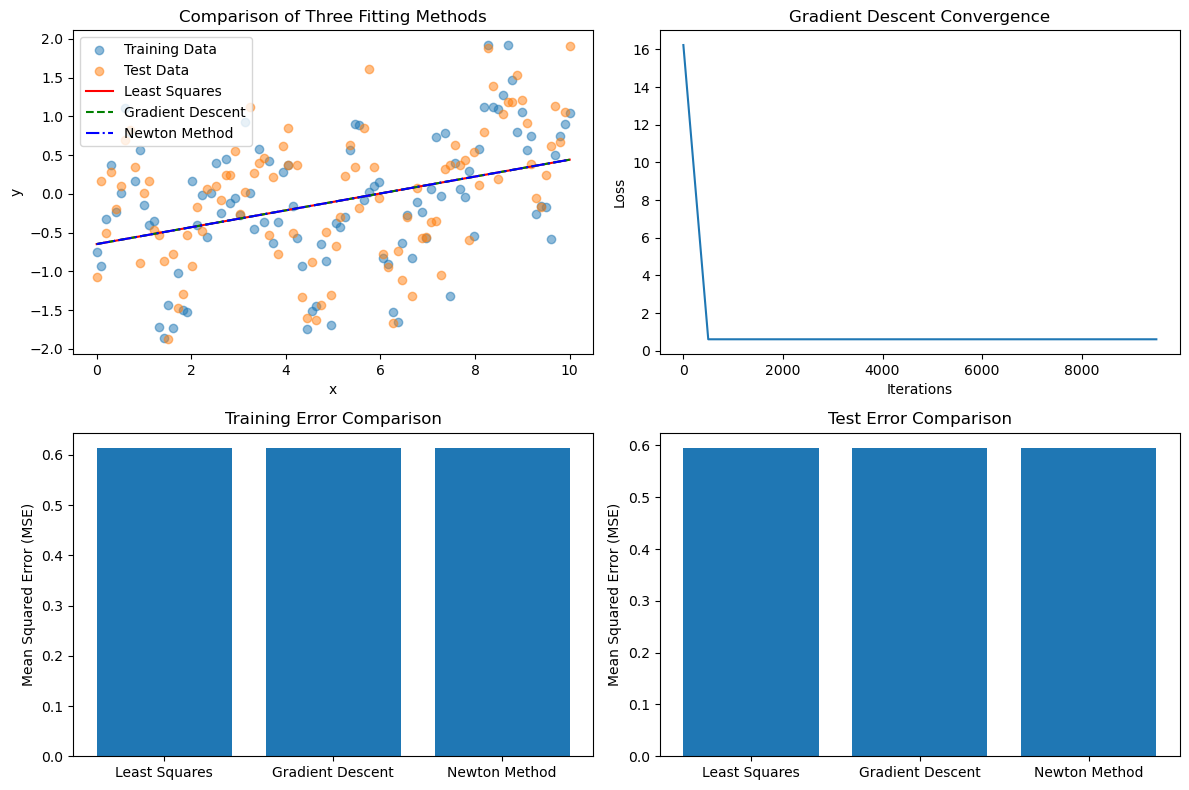

In [ ]:
# Results comparison
results = pd.DataFrame({
    'Method': ['Least Squares', 'Gradient Descent', 'Newton Method'],
    'Train Error': [ls_train_mse, gd_train_mse.item(), nt_train_mse.item()],
    'Test Error': [ls_test_mse, gd_test_mse.item(), nt_test_mse.item()]
})

print("\nError Comparison of Three Methods:")
print(results)

# Visualization of fitting results
plt.figure(figsize=(12, 8))

# Data visualization
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
x_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 100).reshape(-1, 1)
x_range_b = np.c_[np.ones((x_range.shape[0], 1)), x_range]
plt.plot(x_range, x_range_b @ theta_ls, 'r-', label='Least Squares')
plt.plot(x_range, x_range_b @ theta_gd, 'g--', label='Gradient Descent')
plt.plot(x_range, x_range_b @ theta_nt, 'b-.', label='Newton Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Three Fitting Methods')

# Gradient descent convergence process
plt.subplot(2, 2, 2)
plt.plot(range(0, n_iters, 500), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Convergence')

# Training error comparison
plt.subplot(2, 2, 3)
methods = ['Least Squares', 'Gradient Descent', 'Newton Method']
train_errors = [ls_train_mse, gd_train_mse.item(), nt_train_mse.item()]
plt.bar(methods, train_errors)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Error Comparison')

# Test error comparison
plt.subplot(2, 2, 4)
test_errors = [ls_test_mse, gd_test_mse.item(), nt_test_mse.item()]
plt.bar(methods, test_errors)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Error Comparison')

plt.tight_layout()
plt.show()


## 多项式拟合